<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Decision_Tree_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Classifier

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.  

This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

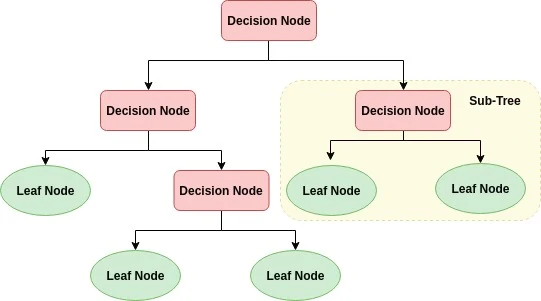

##How Decision Tree Works

1. Make a decision node out of a feature  
2. Break the dataset into smaller subsets
3. Starts tree building by repeating this process recursively 



##Example: Where is your wine from?!

We will use the Wine dataset from sklearn.

The details of the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/wine

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.



In [4]:
import sklearn
import numpy as np

#getting the wine quality dataset
from sklearn.datasets import load_wine
dataset = load_wine()

from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.30, random_state = 45)

The **features (attributes)** are: 

1. Alcohol level
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 


In [20]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']


There are three **classes** for the different areas in Italy where the wine is cultivated: 
Class0, Class1, Class 2

In [25]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Note that this is not a binary classifier because there is more than just two choices when it comes to the predicted classes

Next, we build the classifier...

In [7]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

Let's take a look at the confusion matrix for three classes

In [8]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  1,  0],
       [ 0, 16,  2],
       [ 0,  1, 19]])

Text(0.5, 764.32, 'Predicted label')

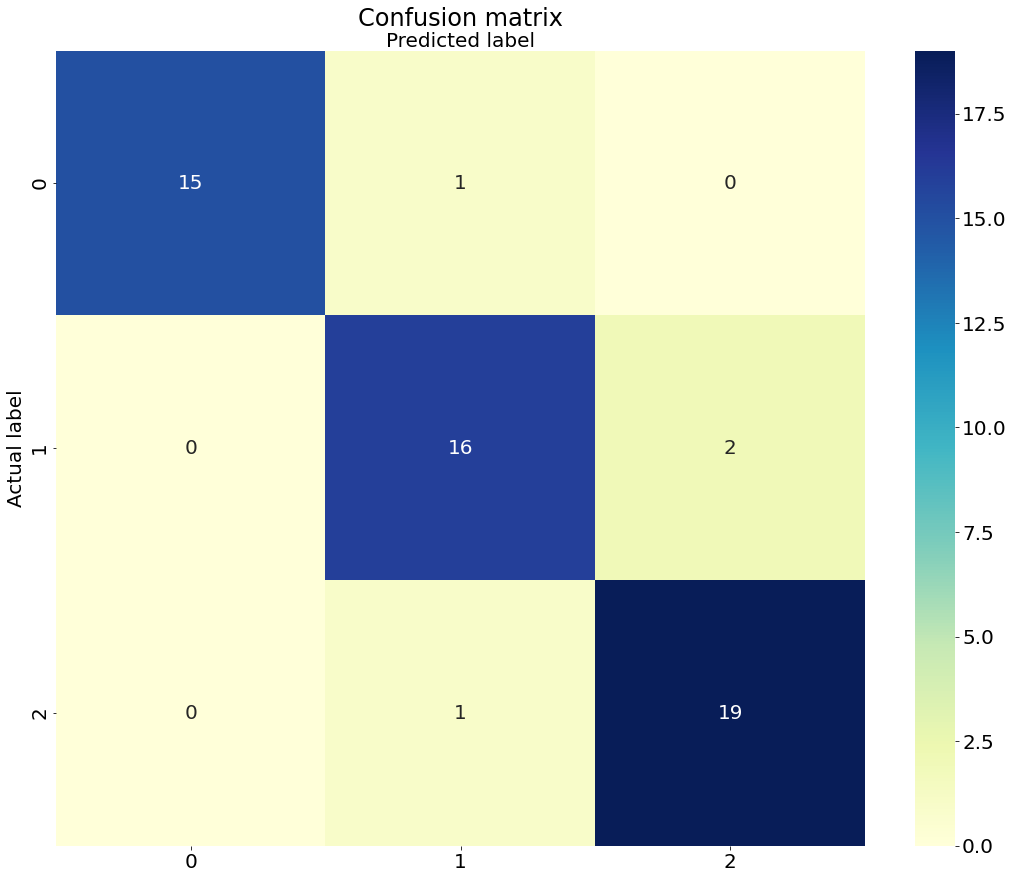

In [10]:
# import required modules
import pandas as pd
import numpy as np
#this is a different plotting package
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(15,12)})

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The metrics are a little different here. Notice that instead of the average saying 'binar' as it did in the other two examples (binary classifiers) is set to macro. This will count the true positives, true negatives, false positives, and false negatives across all three classifiers. 

In [12]:
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='macro'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='macro'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='macro'))))

Accuracy:      0.9259259259259259  
Precision:     0.9312169312169312  
Recall:        0.9254629629629628  
f1 score:      0.9278200308884809  


##Visualizing the decision tree

Much like we did with earlier examples, we want to try and explain our classifier. Why does it work the way it does? The cool thing about decition trees is that you can actually draw out the graph so it is clear how the classification decisions were made

We will use the code below relying on export_graphviz to draw the tree. Notice that the root node is color_intensity<=3.46. If that is true, then the wine is in class 1. If not, then you the classifier looked at flavanoids. If they were <1.44, then the classifier classifies the wine as class 2. Otherwise, the classifier looks at proline. Is it<737? If not, then the wine is in class0. If it is, then the final branch depends on malic acid. If malic_acid<3.92, then class1, else wine is in class0. This is a cool feature of decision trees. 

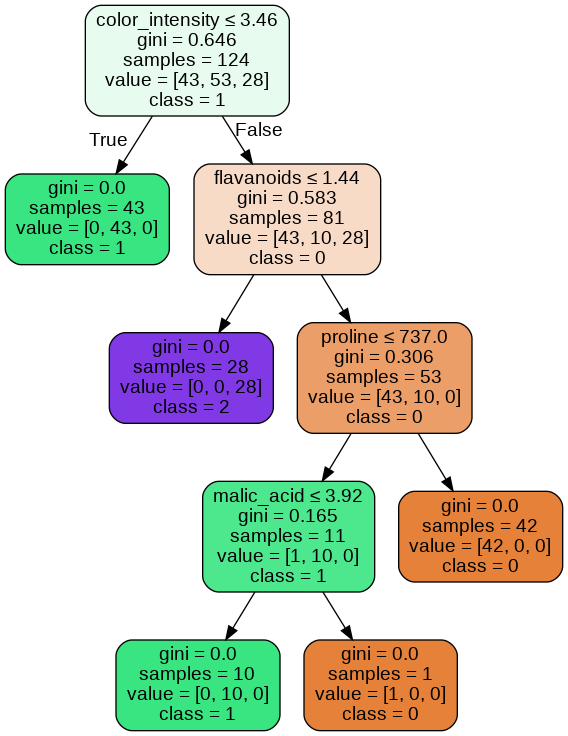

In [23]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = dataset.feature_names,class_names=['0','1','2','3','4','5','6','7','8','9','20'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine.png')
Image(graph.create_png())

##Advantages

1. Decision trees are easy to interpret and visualize.
2. It can easily capture Non-linear patterns.
3. It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
4. It can be used for feature engineering such as predicting missing values, suitable for variable selection. [1] 

References:
https://www.datacamp.com/community/tutorials/decision-tree-classification-python

##Disadvantages

1. Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.
2. Decision trees can overfit easily [1]

References:
https://www.datacamp.com/community/tutorials/decision-tree-classification-python